In [1]:
#%matplotlib widget
import ipywidgets as widgets
import ipyvuetify as v
from ipywidgets import interact_manual
from IPython.display import display

from Visualisation import Visualisation

In [2]:
from matplotlib import pyplot as plt
#import ipympl

import plots


In [3]:
confirmed, deaths, recovered = plots.parse_country_data()
default_countries = "Italy, China, Germany, US"

In [4]:
def reset_plots():
    plt.close('all')
    
btn_generate = v.Btn(children=['Render plots'])

visualisations = []

In [5]:
visualisations.append(
    Visualisation().set_title("Total Count Of Confirmed Cases")
                .set_update_fn(plots.plot_confirmed_cases)
                .set_description("A plot of the total count of confirmed cases by day and country.")
)

visualisations.append(
    Visualisation().set_title("Total Count Of Deaths")
                .set_update_fn(plots.plot_deaths)
                .set_description("A plot of the total count of deaths by day and country.")
)

visualisations.append(
    Visualisation().set_title("Deaths Per Day By Country")
                .set_update_fn(plots.plot_death_rate)
                .set_description("A plot of the total count of deaths by day and country.")
)

visualisations.append(
    Visualisation().set_title("New Cases Per Day By Country")
                .set_update_fn(plots.plot_newly_confirmed_per_day)
                .set_description("A plot of the total count of new cases by day and country.")
)


In [6]:
country_selector = v.Combobox(dense=True, multiple=True, v_model=["Germany", "Italy", "US"], items=confirmed.index.values.tolist())
def get_countries():
    return country_selector.v_model
    
    return [c.strip() for c in country_selector.value.split(',')]


output_total_confirmed = widgets.Output()
output_total_deaths = widgets.Output()
output_cases_since = widgets.Output()
output_error = widgets.Output()
def all_plots(widget=None, event=None, data=None):
    try:
        reset_plots()
        
        for vis in visualisations:
            vis.update(get_countries())
        
    except Exception as e:
        with output_error:
            print(e)
    
btn_generate.on_event("click", all_plots)
all_plots()

Container(children=[Flex(children=[Combobox(dense=True, items=['Afghanistan', 'Albania', 'Algeria', 'Andorra',…

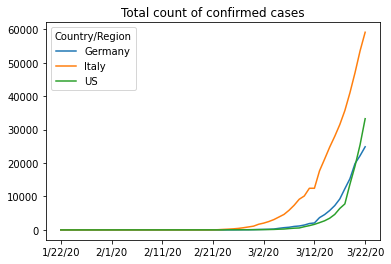

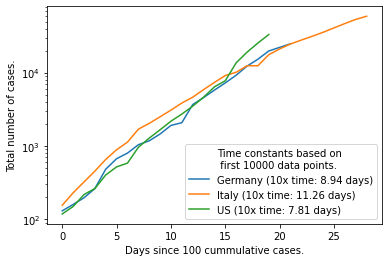

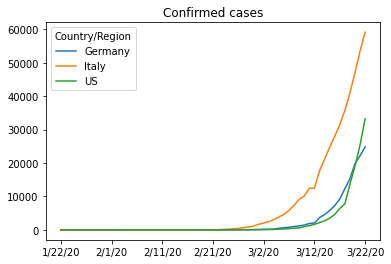

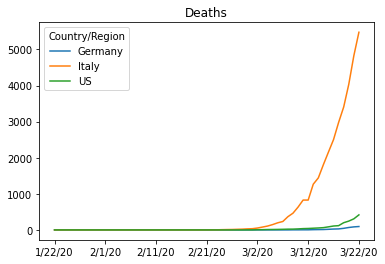

In [8]:
v.Container(_metadata={'mount_id': 'content-main'}, children=[
    v.Flex(children=[
        country_selector,
        btn_generate
    ]),
    v.Flex(children=[
        v.Row(children=[
            v.Col(children=[vis.vuetify_component()]) for vis in visualisations
        ])
    ])
])

In [ ]:
v.Container(_metadata={'mount_id': 'content-nav'}, children=[
    v.Flex(xs12=True, lg6=True, xl6=True, children=[
        output_error
    ])
])